In [ ]:
!python -m pip install -qq kaggle

In [ ]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 /root/.kaggle/kaggle.json
kaggle datasets download sarangdilipjodh/indian-traffic-signs-prediction85-classes
unzip -qq "/content/indian-traffic-signs-prediction85-classes.zip"
rm -rf "/content/sample_data"

100%|██████████| 1.13G/1.13G [00:52<00:00, 22.9MB/s]


In [ ]:
import os
import string
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import re

In [ ]:
# Traning classes
training_classes=os.listdir('/content/traffic_sign_classification_dataset/train')
print('Total classes:',len(training_classes))
print('Class names:',training_classes)
#clean class names
training_classes_clean=[re.sub('[^A-Za-z0-9 ]',' ',class_)for class_ in training_classes]
training_classes_clean=[re.sub('[ ]+','_',class_).casefold() for class_ in training_classes_clean]
print('Cleaned class names:',training_classes_clean)
#rename classes name with clean class names
for old_name,new_name in zip(training_classes,training_classes_clean):
  os.rename(os.path.join('/content/traffic_sign_classification_dataset/train',old_name),
            os.path.join('/content/traffic_sign_classification_dataset/train',new_name))

Total classes: 85
Class names: ['LOAD_LIMIT', 'HEIGHT_LIMIT', 'PASS_EITHER_SIDE', 'GUARDED_LEVEL_CROSSING', 'OVERTAKING_PROHIBITED', 'SPEED_LIMIT_80', 'ROUNDABOUT', 'TRAFFIC_SIGNAL', 'NO_STOPPING_OR_STANDING', 'HORN_PROHIBITED', 'RIGHT_REVERSE_BEND', 'TRUCK_PROHIBITED', 'UNGUARDED_LEVEL_CROSSING', 'NO_PARKING', 'SIDE_ROAD_LEFT', 'MEN_AT_WORK', 'WIDTH_LIMIT', 'COMPULSARY_TURN_LEFT', 'QUAY_SIDE_OR_RIVER_BANK', 'CROSS_ROAD', 'TURN_RIGHT', 'RIGHT_HAIR_PIN_BEND', 'SPEED_LIMIT_70', 'TONGA_PROHIBITED', 'U_TURN_PROHIBITED', 'COMPULSARY_CYCLE_TRACK', 'BARRIER_AHEAD', 'FERRY', 'SIDE_ROAD_RIGHT', 'STOP', 'HUMP_OR_ROUGH_ROAD', 'COMPULSARY_KEEP_RIGHT', 'CYCLE_PROHIBITED', 'CATTLE', 'SPEED_LIMIT_15', 'LOOSE_GRAVEL', 'PEDESTRIAN_CROSSING', 'NARROW_BRIDGE', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'SPEED_LIMIT_60', 'SPEED_LIMIT_5', 'STAGGERED_INTERSECTION', 'PEDESTRIAN_PROHIBITED', 'LEFT_REVERSE_BEND', 'COMPULSARY_SOUND_HORN', 'SPEED_LIMIT_30', 'PRIORITY_FOR_ONCOMING_VEHICLES', 'FALLING_ROCKS', 'COMPULSARY_TUR

In [ ]:
# Testing classes
testing_classes=os.listdir('/content/traffic_sign_classification_dataset/test')
print('Total classes:',len(testing_classes))
print('Class names:',testing_classes)
#clean class names
testing_classes_clean=[re.sub('[^A-Za-z0-9 ]',' ',class_)for class_ in testing_classes]
testing_classes_clean=[re.sub('[ ]+','_',class_).casefold() for class_ in testing_classes_clean]
print('Cleaned class names:',testing_classes_clean)
#rename classes name with clean class names
for old_name,new_name in zip(testing_classes,testing_classes_clean):
  os.rename(os.path.join('/content/traffic_sign_classification_dataset/test',old_name),
            os.path.join('/content/traffic_sign_classification_dataset/test',new_name))

Total classes: 85
Class names: ['LOAD_LIMIT', 'HEIGHT_LIMIT', 'PASS_EITHER_SIDE', 'GUARDED_LEVEL_CROSSING', 'OVERTAKING_PROHIBITED', 'SPEED_LIMIT_80', 'ROUNDABOUT', 'TRAFFIC_SIGNAL', 'NO_STOPPING_OR_STANDING', 'HORN_PROHIBITED', 'RIGHT_REVERSE_BEND', 'TRUCK_PROHIBITED', 'UNGUARDED_LEVEL_CROSSING', 'NO_PARKING', 'SIDE_ROAD_LEFT', 'MEN_AT_WORK', 'WIDTH_LIMIT', 'COMPULSARY_TURN_LEFT', 'QUAY_SIDE_OR_RIVER_BANK', 'CROSS_ROAD', 'TURN_RIGHT', 'RIGHT_HAIR_PIN_BEND', 'SPEED_LIMIT_70', 'TONGA_PROHIBITED', 'U_TURN_PROHIBITED', 'COMPULSARY_CYCLE_TRACK', 'BARRIER_AHEAD', 'FERRY', 'SIDE_ROAD_RIGHT', 'STOP', 'HUMP_OR_ROUGH_ROAD', 'COMPULSARY_KEEP_RIGHT', 'CYCLE_PROHIBITED', 'CATTLE', 'SPEED_LIMIT_15', 'LOOSE_GRAVEL', 'PEDESTRIAN_CROSSING', 'NARROW_BRIDGE', 'ALL_MOTOR_VEHICLE_PROHIBITED', 'SPEED_LIMIT_60', 'SPEED_LIMIT_5', 'STAGGERED_INTERSECTION', 'PEDESTRIAN_PROHIBITED', 'LEFT_REVERSE_BEND', 'COMPULSARY_SOUND_HORN', 'SPEED_LIMIT_30', 'PRIORITY_FOR_ONCOMING_VEHICLES', 'FALLING_ROCKS', 'COMPULSARY_TUR

In [ ]:

from tensorflow.python.ops.gen_batch_ops import batch
#load dataset - train,test and valid
train=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/train',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=64,image_size=(224,224),
                                                  shuffle=True,validation_split=0.3,
                                                  interpolation='bilinear',
                                                  subset='training',seed=8,)


valid=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/train',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=64,image_size=(224,224),
                                                  shuffle=True,validation_split=0.3,
                                                  interpolation='bilinear',
                                                  subset='validation',seed=8,)

test=tf.keras.utils.image_dataset_from_directory('/content/traffic_sign_classification_dataset/test',
                                                  labels='inferred',label_mode='int',class_names=None,
                                                  color_mode='rgb',batch_size=64,image_size=(224,224),
                                                  shuffle=False,validation_split=0.0,
                                                  interpolation='bilinear',
                                                  subset=None,seed=8,)
print('Total training images:',train.cardinality()*32)
print('Total validation images:',valid.cardinality()*32)
print('Total test images:',test.cardinality()*32)
training_classes:list=train.class_names
valid_classes:list=train.class_names
test_classes:list=train.class_names
assert training_classes==valid_classes==test_classes,'class count in train, valid and test set is not same'
print('Class names:',training_classes)

Found 4438 files belonging to 85 classes.
Using 3107 files for training.
Found 4438 files belonging to 85 classes.
Using 1331 files for validation.
Found 1288 files belonging to 85 classes.
Total training images: tf.Tensor(1568, shape=(), dtype=int64)
Total validation images: tf.Tensor(672, shape=(), dtype=int64)
Total test images: tf.Tensor(672, shape=(), dtype=int64)
Class names: ['all_motor_vehicle_prohibited', 'axle_load_limit', 'barrier_ahead', 'bullock_and_handcart_prohibited', 'bullock_prohibited', 'cattle', 'compulsary_ahead', 'compulsary_ahead_or_turn_left', 'compulsary_ahead_or_turn_right', 'compulsary_cycle_track', 'compulsary_keep_left', 'compulsary_keep_right', 'compulsary_minimum_speed', 'compulsary_sound_horn', 'compulsary_turn_left', 'compulsary_turn_left_ahead', 'compulsary_turn_right', 'compulsary_turn_right_ahead', 'cross_road', 'cycle_crossing', 'cycle_prohibited', 'dangerous_dip', 'direction', 'falling_rocks', 'ferry', 'gap_in_median', 'give_way', 'guarded_level_cr

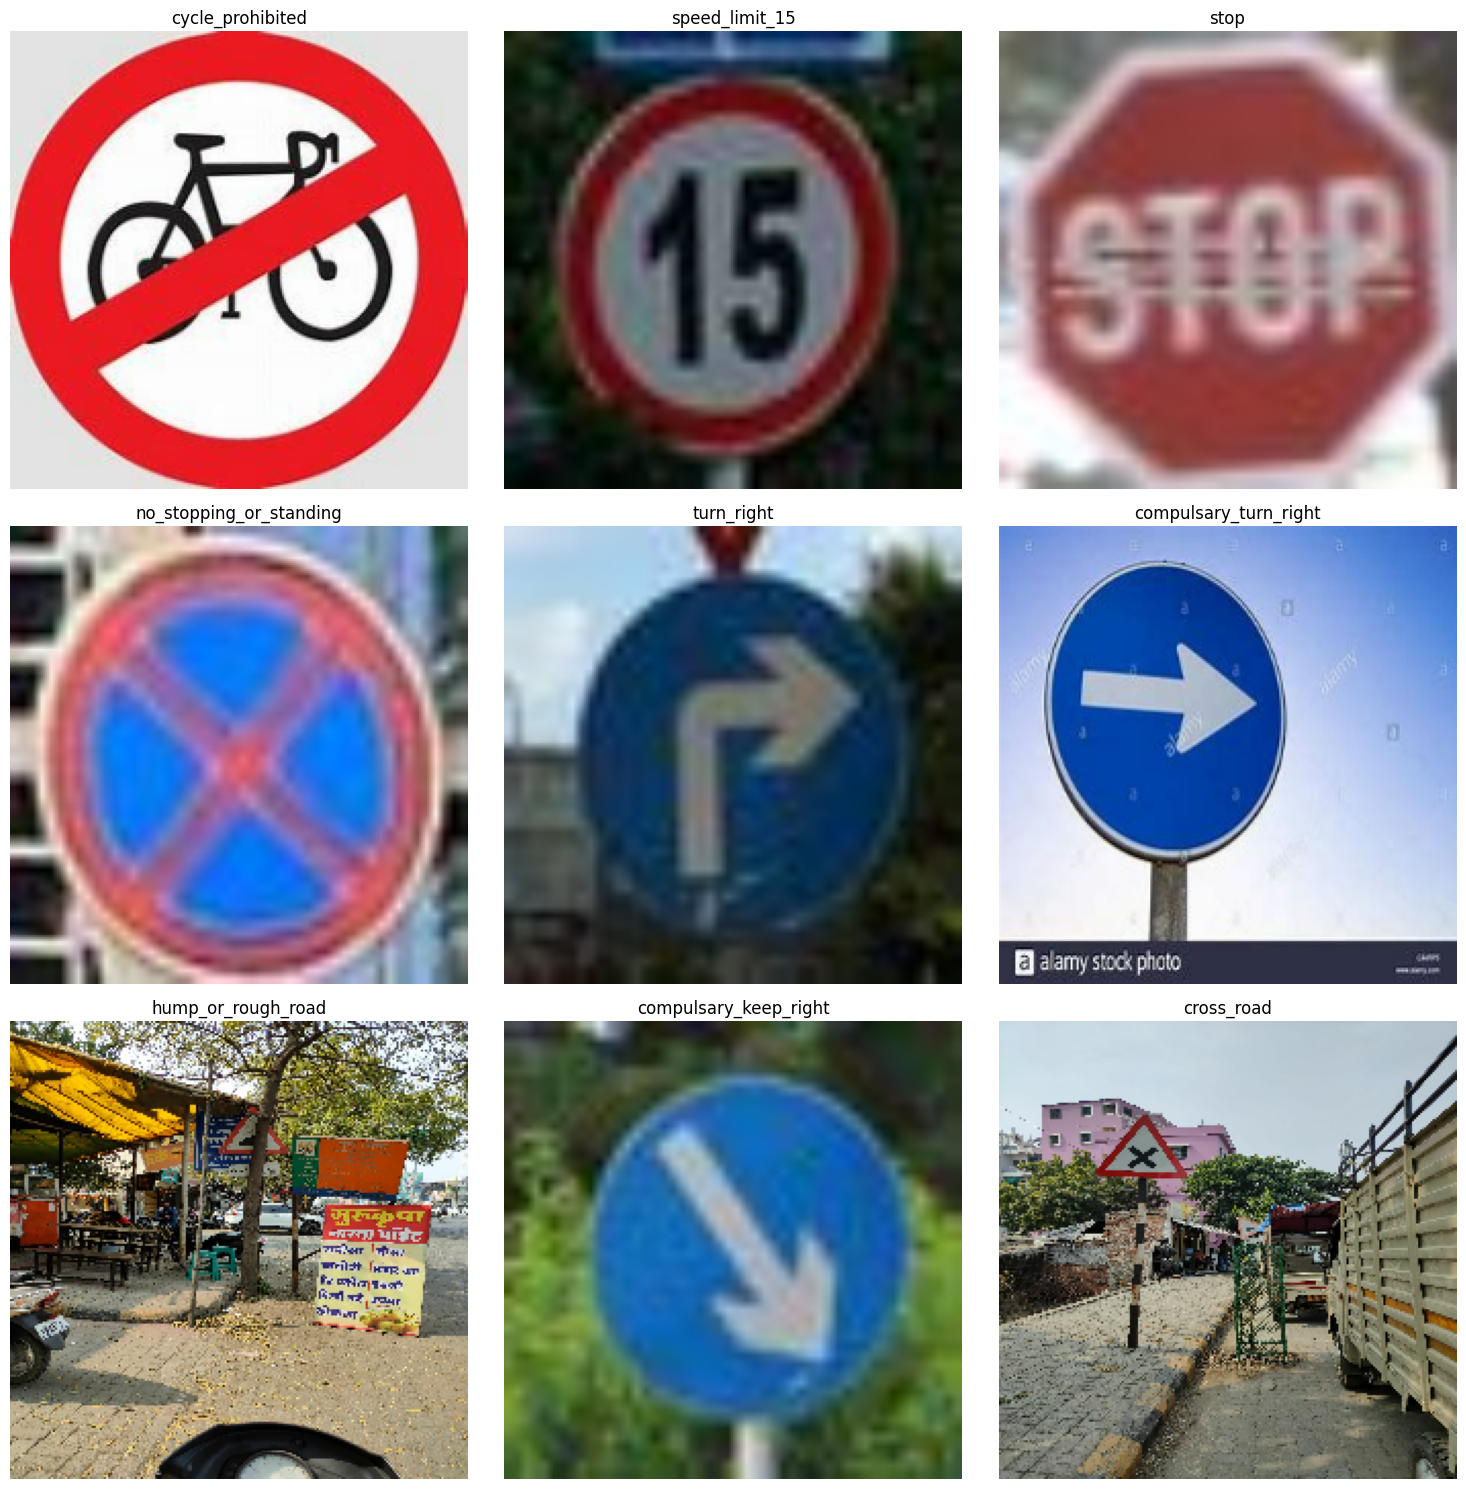

In [ ]:
#make plot data
for images,labels in train.take(1):break
images_to_plot:int=9
plt.figure(figsize=(15,15))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(training_classes[labels[index].numpy()])
plt.tight_layout()
plt.show()

In [ ]:
base_model=tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))# laod base model - VGG16
#base_model.summary(line_length=120,positions=None,print_fn=None,expand_nested=True,show_trainable=False,layer_range=None)# print base model summary
base_model.trainable=False                                                      # make freeze base

In [ ]:
inputs=tf.keras.layers.Input(shape=(224,224,3),batch_size=None,name='model_inputs')# add input layer
model_x=tf.keras.layers.Rescaling(1/255,offset=0.0,name='rescaler')(inputs)     # rescale inputs
model_x=base_model(model_x)                                                     # feed inputs to base model
model_x=tf.keras.layers.Flatten(name='flatten')(model_x)                         # make flatten outputs
model_x=tf.keras.layers.Dense(1024,activation='relu')(model_x)                  # apply dense layer
outputs=tf.keras.layers.Dense(len(training_classes),activation='softmax')(model_x)# output layer
model=tf.keras.Model(inputs=[inputs],outputs=[outputs],name='custom_vgg16')     # build model
model.summary(line_length=120,positions=None,print_fn=None,expand_nested=True,show_trainable=True,layer_range=None)# print model summary

Model: "custom_vgg16"
___________________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           Trainable  
 model_inputs (InputLayer)                            [(None, 224, 224, 3)]                           0                 Y          
                                                                                                                                   
 rescaler (Rescaling)                                 (None, 224, 224, 3)                             0                 Y          
                                                                                                                                   
 vgg16 (Functional)                                   (None, 7, 7, 512)                               14714688          N          
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

In [ ]:
# make compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
# make early stopping
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0,patience=10,verbose=1,mode='auto',restore_best_weights=True)

# make train model
history=model.fit(train,batch_size=None,epochs=10_000,verbose=2,callbacks=[early_stop],
                  validation_split=0,validation_data=valid,shuffle=True)

Epoch 1/10000
49/49 - 88s - loss: 4.1044 - sparse_categorical_accuracy: 0.4001 - val_loss: 1.4089 - val_sparse_categorical_accuracy: 0.6296 - 88s/epoch - 2s/step
Epoch 2/10000
49/49 - 56s - loss: 0.8190 - sparse_categorical_accuracy: 0.7879 - val_loss: 0.9615 - val_sparse_categorical_accuracy: 0.7400 - 56s/epoch - 1s/step
Epoch 3/10000
49/49 - 53s - loss: 0.4696 - sparse_categorical_accuracy: 0.8719 - val_loss: 0.8142 - val_sparse_categorical_accuracy: 0.7746 - 53s/epoch - 1s/step
Epoch 4/10000
49/49 - 59s - loss: 0.3225 - sparse_categorical_accuracy: 0.9186 - val_loss: 0.8402 - val_sparse_categorical_accuracy: 0.7776 - 59s/epoch - 1s/step
Epoch 5/10000
49/49 - 59s - loss: 0.2332 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.7228 - val_sparse_categorical_accuracy: 0.8152 - 59s/epoch - 1s/step
Epoch 6/10000
49/49 - 55s - loss: 0.1942 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.6901 - val_sparse_categorical_accuracy: 0.8212 - 55s/epoch - 1s/step
Epoch 7/10000
49/49 - 59s - 

In [ ]:
# see model history (first five epoches)
pd.DataFrame(history.history).head()


,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,4.104395,0.400064,1.408937,0.629602
1,0.818998,0.787898,0.961461,0.740045
2,0.469582,0.871902,0.814182,0.774606
3,0.322529,0.918571,0.840203,0.777611
4,0.233205,0.945285,0.722818,0.815177


In [ ]:
# see model history (last five epoches)
pd.DataFrame(history.history).tail()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
27,0.030883,0.992276,0.618648,0.857250
28,0.029457,0.989379,0.556693,0.867017
29,0.022003,0.993241,0.575067,0.861758
30,0.020466,0.991632,0.574467,0.870023
31,0.037970,0.985517,0.700492,0.837716


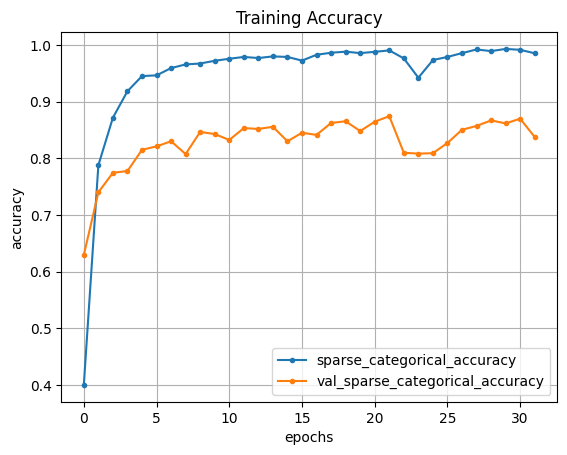

In [ ]:
# make plot training accuracy and validation accuracy
pd.DataFrame(history.history)[['sparse_categorical_accuracy','val_sparse_categorical_accuracy']].plot(marker='.')# make plot
plt.grid(),plt.title('Training Accuracy'),plt.xlabel('epochs'),plt.ylabel('accuracy')# add grid, title and axis labels
plt.show()                                                                      # make plot show

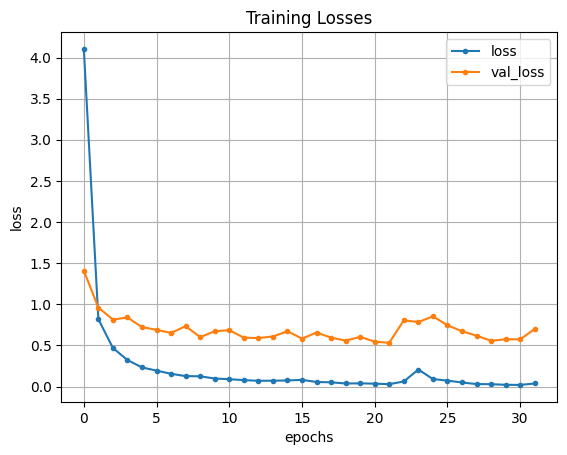

In [ ]:
# make plot training losses and validation losses
pd.DataFrame(history.history)[['loss','val_loss']].plot(marker='.')             # make plot
plt.grid(),plt.title('Training Losses'),plt.xlabel('epochs'),plt.ylabel('loss') # add grid, title and axis labels
plt.show()                                                                      # make plot show

In [ ]:
# evaluate model
results=model.evaluate(test,batch_size=None,verbose="auto",sample_weight=None,return_dict=True)
print('Testing results:',results)                                               # make print results

21/21 [==============================] - 9s 457ms/step - loss: 0.6637 - sparse_categorical_accuracy: 0.8610
Testing results: {'loss': 0.6636962890625, 'sparse_categorical_accuracy': 0.8610248565673828}


In [ ]:
# make save model (weights and configuration)
model.save('traffic_sign_classifier',overwrite=True,save_format=None)           # make save

In [ ]:
!zip -r -qq "traffic_sign_classifier.zip" "traffic_sign_classifier"             # make zip model
# make auto download model weights
from google.colab import files                                                  # load file class
files.download('traffic_sign_classifier.zip')                                   # download model zip file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>